# Import Modules

In [1]:
from Dataload import dataload

from module import transformer,video_model,invres

import torch
import torch.nn as nn
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from torchvision import  utils
from constant import EMOTIPATH
from src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
from torchvision import transforms

In [2]:


#np_load_old = np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


# Test Image #1

In [3]:
import os
Train_label=os.path.join(EMOTIPATH,"Train_labels.txt")
Train_video=os.path.join(EMOTIPATH,"Train")
Val_labels=os.path.join(EMOTIPATH,"Val_labels.txt")
Val_video=os.path.join(EMOTIPATH,"Val")
train_data=dataload.Video_Frame_Data(Train_label,base_path_v=Train_video,frame_num=24)


    
    


In [4]:
def face_extraction(img,max_number):
        def toonePIL(x,max_number):
            new_im = Image.new('RGB', (64*max_number,64))

            x_offset = 0
            for im in x:
                new_im.paste(im, (x_offset,0))
                x_offset += im.size[0]
            return new_im

        bounding_boxes, landmarks = detect_faces(img)
        img_list=[]
        transform=transforms.Resize((64,64))
        for box_index,(left,right,up,bottom,_) in enumerate(bounding_boxes):
            cropped_img=img.crop((left,right,up,bottom))
            img_list.append(transform(cropped_img))
            
            if len(img_list)==max_number:
                break
        while len(img_list) !=max_number:
            END_PAD= Image.new(mode = "RGB", size = (64, 64), color =(0, 0, 0))
            img_list.append(END_PAD)
        return toonePIL(img_list,max_number)
    

In [5]:
import pandas as pd
class Video_Data():
    def __init__(self,csv_file,sub_csv_file=None,
                 base_path_v=None,frame_num=16,embedding=False):
        
        self.max_frame_num=24
        self._table = pd.read_csv(csv_file,delimiter=' ')
        if sub_csv_file is None:
            self._table_embedding=None
        else:
            self._table_embedding=pd.read_csv(sub_csv_file)
        self.frame_num = frame_num
        self._base_path_v=base_path_v
        self.embedding=embedding

            

        self.transform=transforms.Compose([
                     transforms.Resize((256,256)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
    def __len__(self):
        return len(self._table)

    def __getitem__(self, idx):
        folder_name = os.path.join(self._base_path_v,self._table.Vid_name[idx])
        frame_list=os.listdir(folder_name)


        return folder_name,frame_list
    


In [6]:
train_data=Video_Data(Train_label,base_path_v=Train_video,frame_num=24)
valid_data=Video_Data(Val_labels,base_path_v=Val_video,frame_num=24)


In [12]:
os.mkdir('../../../hdd/Dataset/Dataset/Face_Cropped/Val')

/opt/notebooks/Github/EmotiW2020/src/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile=True)
/opt/notebooks/Github/EmotiW2020/src/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/opt/notebooks/Github/EmotiW2020/src/detector.py:79: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
/opt/notebooks/Github/EmotiW2020/src/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/opt/notebooks/Github/EmotiW2020/src/detector.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.Fl

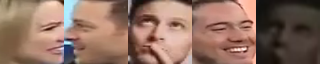

In [8]:
from tqdm.notebook import tqdm
path=os.path.join(valid_data[26][0],valid_data[26][1][0])
test_img=Image.open(path)
face_extraction(test_img,5)

In [13]:
from tqdm.notebook import tqdm

new_base_path="../../../hdd/Dataset/Dataset/Face_Cropped/"


for index in tqdm(valid_data):
    video_name,frame_list=index
    for frame_name in frame_list:
        
        path=os.path.join(video_name,frame_name)
        img=Image.open(path)
        try:
            face_cropped=face_extraction(img,5)
        except:
            print(video_name,frame_name)
        save_path=os.path.join(new_base_path,"Val",os.path.basename(video_name))
      
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        face_cropped.save((os.path.join(save_path,frame_name)))


../../../hdd/Dataset/Dataset/Val/289_15 000023.png
../../../hdd/Dataset/Dataset/Val/289_16 000005.png
../../../hdd/Dataset/Dataset/Val/320_15 000025.png
../../../hdd/Dataset/Dataset/Val/320_15 000007.png
../../../hdd/Dataset/Dataset/Val/320_16 000008.png
../../../hdd/Dataset/Dataset/Val/325_55 000023.png


KeyError: 766

In [195]:
from tqdm.notebook import tqdm

new_base_path="../../../hdd/Dataset/Dataset/Face_Cropped/"


for index in tqdm(train_data):
    video_name,frame_list=index
    for frame_name in frame_list:
        
        path=os.path.join(video_name,frame_name)
        img=Image.open(path)
        try:
            face_cropped=face_extraction(img,5)
        except:
            print(video_name,frame_name)
        save_path=os.path.join(new_base_path,"Train",os.path.basename(video_name))
      
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        face_cropped.save((os.path.join(save_path,frame_name)))


../../../hdd/Dataset/Dataset/Train/9_7 000024.png
../../../hdd/Dataset/Dataset/Train/16_7 000020.png
../../../hdd/Dataset/Dataset/Train/22_11 000018.png
../../../hdd/Dataset/Dataset/Train/25_7 000024.png
../../../hdd/Dataset/Dataset/Train/38_5 000021.png
../../../hdd/Dataset/Dataset/Train/38_5 000019.png
../../../hdd/Dataset/Dataset/Train/38_5 000020.png
../../../hdd/Dataset/Dataset/Train/41_1 000025.png
../../../hdd/Dataset/Dataset/Train/57_13 000024.png
../../../hdd/Dataset/Dataset/Train/57_13 000023.png
../../../hdd/Dataset/Dataset/Train/82_14 000025.png
../../../hdd/Dataset/Dataset/Train/82_14 000026.png
../../../hdd/Dataset/Dataset/Train/82_14 000024.png
../../../hdd/Dataset/Dataset/Train/82_14 000023.png
../../../hdd/Dataset/Dataset/Train/82_15 000017.png
../../../hdd/Dataset/Dataset/Train/89_2 000008.png
../../../hdd/Dataset/Dataset/Train/101_2 000026.png
../../../hdd/Dataset/Dataset/Train/101_2 000024.png
../../../hdd/Dataset/Dataset/Train/121_11 000007.png
../../../hdd/Dataset

KeyError: 2661

['Val_labels.txt', 'Train', '.ipynb_checkpoints', 'Val', 'Train_labels.txt']

In [197]:
path=os.path.join("../../../hdd/Dataset/Dataset/Train/9_7","000024.png")
img=Image.open(path)

In [199]:
face_cropped=face_extraction(img,5)

ValueError: need at least one array to concatenate

In [68]:
loss_func = torch.nn.MSELoss()


In [ ]:
import pandas as pd
training_data=pd.read_csv("training.csv")

from torch.utils.data import Dataset, DataLoader


In [ ]:
class AffectNetData(Dataset):
    def __init__(self, csv_file,base_path):
        self._base_path=base_path
        self._table = pd.read_csv(csv_file)
        self.transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
    def __len__(self):
        return len(self._table)

    def __getitem__(self, idx):
        img_path = os.path.join(self._base_path_v,self._table.subDirectory_filepath[idx])
        arousal=torch.from_numpy(np.array(self._table.arousal[idx]))
        valence=torch.from_numpy(np.array(self._table.valence[idx]))
        labels=torch.stack(arousal,valence).float()
        img=Image.open(img_path)
        img=self.transform(img)
        return (img,labels)

In [ ]:
data_transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

In [ ]:
#
#train_set=AffectNetData("training.csv","AffectNet")
#valid_set=AffectNetData("validation.csv","AffectNet")

In [ ]:
#train_dataloader = DataLoader(train_data, batch_size=256
#                       , num_workers=0,shuffle=True)

#valid_dataloader = DataLoader(valid_data, batch_size=256
#                       , num_workers=0)

In [ ]:
#da